In [1]:
import numpy as np
import matplotlib.pyplot as plt
import SCEA
import cmcrameri.cm as cmc
# default colormap to batlow
plt.rcParams['image.cmap'] = 'cmc.batlow' 

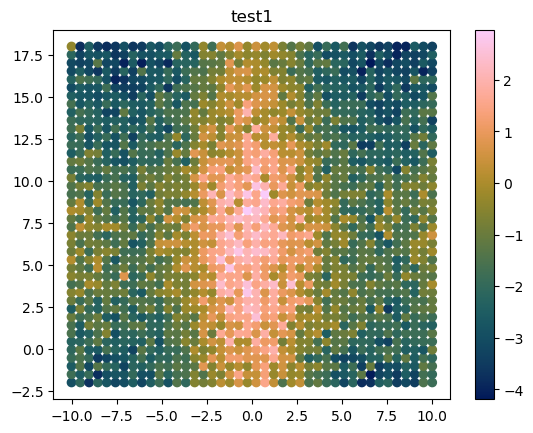

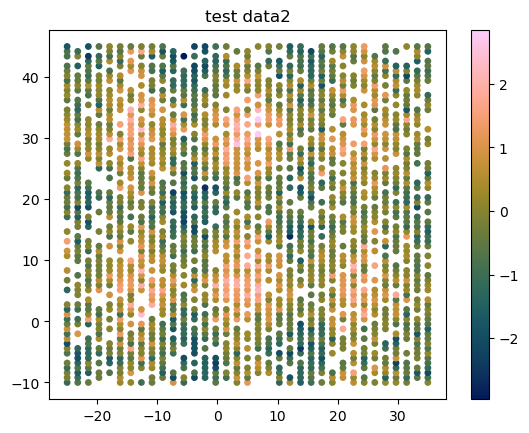

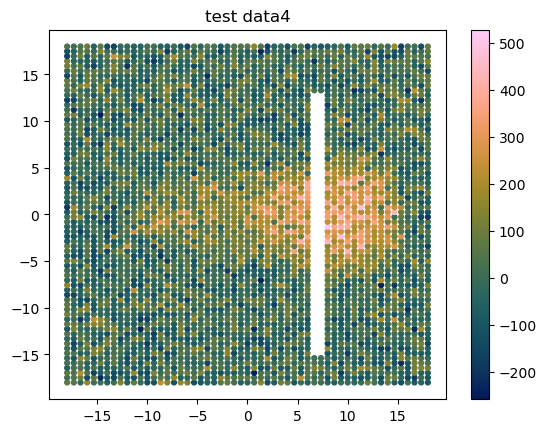

Text(0.5, 1.0, 'test data5')

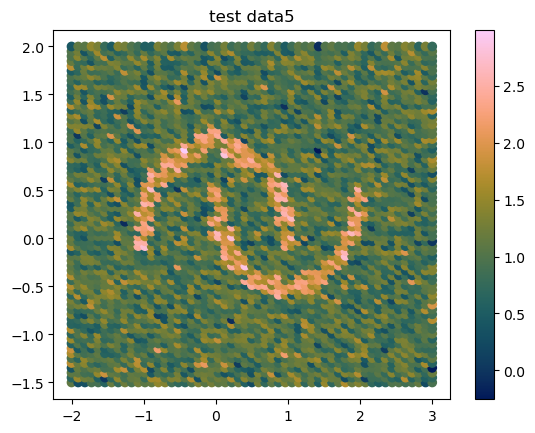

In [2]:
# Create test data sets



def test1data():
    # Lets generate test points
    meshgrid = np.meshgrid(np.linspace(-10,10,42), np.linspace(-2,18,42))
    test_x = meshgrid[0].flatten()
    test_y = meshgrid[1].flatten()
    test_value = np.cos(test_x/2)+np.sin(test_y/4) - np.abs(test_x)*0.2 + np.random.normal(0,0.6,len(test_x))
    return test_x,test_y,test_value

test1_x,test1_y,test1_value = test1data()
plt.scatter(test1_x, test1_y, c=test1_value)
plt.title("test1")
plt.colorbar()
plt.show()




def test2data():
    # Lets generate harder test points
    meshgrid = np.meshgrid(np.linspace(-25,35,35), np.linspace(-10,45,70))
    test2_x = meshgrid[0].flatten()
    test2_y = meshgrid[1].flatten()
    test2_value = (np.sin(test2_x/3)+np.sin(test2_y/4))/(0.05*np.abs(test2_x)+1) + np.random.normal(0,0.6,len(test2_x)) 

    # Remove 20% of the points randomly
    points_to_remove = np.random.choice(len(test2_value), int(len(test2_value)*0.2), replace=False)
    test2_x = np.delete(test2_x, points_to_remove)
    test2_y = np.delete(test2_y, points_to_remove)
    test2_value = np.delete(test2_value, points_to_remove)
    return test2_x,test2_y,test2_value

test2_x,test2_y,test2_value = test2data()

plt.scatter(test2_x,test2_y, c=test2_value, s=15)
plt.title("test data2")
plt.colorbar()
plt.show()






def test4data():
    # Lets generate harder test points
    meshgrid = np.meshgrid(np.linspace(-18,18,55), np.linspace(-18,18,70))
    test4_x = meshgrid[0].flatten()
    test4_y = meshgrid[1].flatten()
    test4_value = -0.01*test4_x**4 + 1.3*test4_x**2 + 12*test4_x + 100 - 6*test4_y**2 + 80
    test4_value[test4_value<0] = 0
    test4_value = test4_value + np.random.normal(0,80,len(test4_value))

    # Remove points in the shape of an ellipse
    a,b = 1,15
    centre = [7,-1] 
    ellipse_equation = ((test4_x-centre[0])**2/a**2 + (test4_y-centre[1])**2/b**2)>1
    test4_x = test4_x[ellipse_equation]
    test4_y = test4_y[ellipse_equation]
    test4_value = test4_value[ellipse_equation]
    return test4_x,test4_y,test4_value

test4_x,test4_y,test4_value = test4data()
plt.scatter(test4_x,test4_y, c=test4_value, s=12)
plt.title("test data4")
plt.colorbar()
plt.show()


def test5data():
    from sklearn import datasets
    moons = np.transpose(datasets.make_moons(n_samples=70, noise=0.04)[0])

    meshgrid = np.meshgrid(np.linspace(-2,3,55), np.linspace(-1.5,2,70))
    test5_x = meshgrid[0].flatten()
    test5_y = meshgrid[1].flatten()
    test5_value = np.ones(len(test5_x)) 

    for i in range(len(moons[0])):
        test5_value[np.sqrt((test5_x-moons[0][i])**2+(test5_y-moons[1][i])**2)<0.1] = 2
            
    test5_value = test5_value + np.random.normal(0,0.35,len(test5_value))
    return test5_x,test5_y,test5_value

test5_x,test5_y,test5_value = test5data()

plt.scatter(test5_x,test5_y, c=test5_value)
plt.colorbar()
plt.title("test data5")



In [3]:
# The spatial data points must be given in one variable of shape (n_points, n_dimensions)

data_points = np.vstack((test2_x, test2_y)).T
data_points

array([[-25.        , -10.        ],
       [-23.23529412, -10.        ],
       [-21.47058824, -10.        ],
       ...,
       [ 31.47058824,  45.        ],
       [ 33.23529412,  45.        ],
       [ 35.        ,  45.        ]], shape=(1960, 2))

Found  5  clusters
clusters: [0. 0. 0. ... 0. 0. 0.]


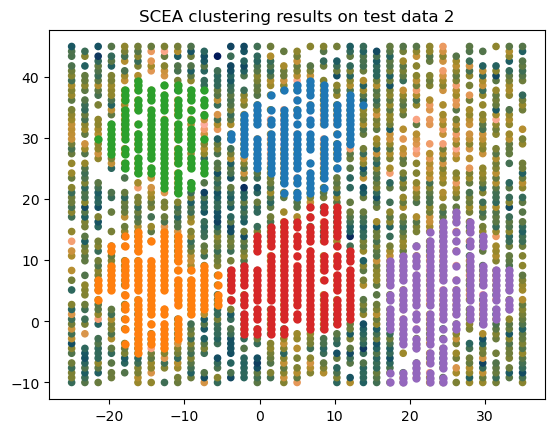

In [17]:
# Run SCEA on test data 2

point_coordinates = np.vstack((test2_x, test2_y)).T
point_values = test2_value

# Run SCEA
clusters = SCEA.scea(
    point_coordinates = data_points,
    point_values = test2_value,
    growth_limit=1, # smaller value, bigger clusters
    detection_limit=2.5, # smaller value, more clusters
    radius_func="default",
    n_clusters="auto",
    point_value_threshold="stds_from_median",
    distance_matrix="euclidean",
    max_points_in_start_radius=7,
    local_box_size=0,
    verbose=True,
)

# the output is a integer list of size (n_points,) where:
# 0: no cluster assigned
# 1: cluster 1
# ...
# n: cluster n
print("clusters:", clusters)






# Lets plot the results
plt.scatter(test2_x, test2_y, c=test2_value, s=20)
for cluster_id in range(1, int(np.max(clusters)+1)):
    if cluster_id == 0: # skip unclustered points
        continue
    else:
        cluster_points = (clusters == cluster_id)
        plt.scatter(test2_x[cluster_points], test2_y[cluster_points], s=20, linewidths=1.5, label=f'Cluster {cluster_id}')
plt.title("SCEA clustering results on test data 2")
plt.show()